In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
#  from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [3]:
dfBikes = pd.read_csv('https://kanaries-app.s3.ap-northeast-1.amazonaws.com/public-datasets/bike_sharing_dc.csv', parse_dates=[])
dfBikes

,date,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
0,2011-01-01,1,winter,0,2011,no,3.28,3.0014,81.0,0.0000,3,13,16,0,am,6
1,2011-01-01,1,winter,1,2011,no,2.34,1.9982,80.0,0.0000,8,32,40,0,am,6
2,2011-01-01,1,winter,2,2011,no,2.34,1.9982,80.0,0.0000,5,27,32,0,am,6
3,2011-01-01,1,winter,3,2011,no,3.28,3.0014,75.0,0.0000,3,10,13,0,am,6
4,2011-01-01,1,winter,4,2011,no,3.28,3.0014,75.0,0.0000,0,1,1,0,am,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,12,winter,19,2012,no,4.22,1.0016,60.0,11.0014,11,108,119,1,pm,1
17375,2012-12-31,12,winter,20,2012,no,4.22,1.0016,60.0,11.0014,8,81,89,1,pm,1
17376,2012-12-31,12,winter,21,2012,no,4.22,1.0016,60.0,11.0014,7,83,90,1,pm,1
17377,2012-12-31,12,winter,22,2012,no,4.22,1.9982,56.0,8.9981,13,48,61,1,pm,1


In [4]:
estacion = dfBikes.groupby('season').size().index
estacion

Index(['fall', 'spring', 'summer', 'winter'], dtype='object', name='season')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
codificador = LabelEncoder()
dfBikes['season'] = codificador.fit_transform(dfBikes['season'])
dfBikes['holiday'] = codificador.fit_transform(dfBikes['holiday'])
dfBikes['am or pm'] = codificador.fit_transform(dfBikes['am or pm'])

In [7]:
train, test = train_test_split(dfBikes, test_size=0.4, stratify=dfBikes['season'], random_state=10)

In [8]:
train.head()

,date,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
9301,2012-01-28,1,3,11,2012,0,6.10,3.9980,56.0,8.9981,55,241,296,0,0,6
4377,2011-07-06,7,2,7,2011,0,25.84,30.0020,79.0,0.0000,24,288,312,1,0,3
2400,2011-04-14,4,1,22,2011,0,14.56,15.0002,55.0,7.0015,22,82,104,1,1,4
9673,2012-02-13,2,3,0,2012,0,-1.42,-6.9976,46.0,15.0013,0,9,9,1,0,1
15393,2012-10-08,10,0,14,2012,1,11.74,11.9972,58.0,7.0015,121,299,420,1,1,1


In [9]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10427 entries, 9301 to 4245
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10427 non-null  object 
 1   month            10427 non-null  int64  
 2   season           10427 non-null  int64  
 3   hour             10427 non-null  int64  
 4   year             10427 non-null  int64  
 5   holiday          10427 non-null  int64  
 6   temperature      10427 non-null  float64
 7   feeling_temp     10427 non-null  float64
 8   humidity         10427 non-null  float64
 9   winspeed         10427 non-null  float64
 10  casual           10427 non-null  int64  
 11  registered       10427 non-null  int64  
 12  count            10427 non-null  int64  
 13  work yes or not  10427 non-null  int64  
 14  am or pm         10427 non-null  int64  
 15  Day of the week  10427 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 1.4+ MB


None

In [10]:
train.describe()

,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
count,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000
mean,6.526805,1.493910,11.576772,2011.500336,0.027429,15.329706,15.360345,62.724657,12.717592,35.555769,153.231227,188.786995,0.853841,0.465522,2.994150
std,3.440337,1.112352,6.933692,0.500024,0.163337,9.061632,11.368995,19.183287,8.123810,48.888743,151.702694,181.342968,0.353282,0.498834,2.012541
min,1.000000,0.000000,0.000000,2011.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,6.000000,2011.000000,0.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000,1.000000,0.000000,1.000000
50%,7.000000,1.000000,12.000000,2012.000000,0.000000,15.500000,15.996800,63.000000,11.001400,17.000000,114.000000,140.000000,1.000000,0.000000,3.000000
75%,10.000000,2.000000,18.000000,2012.000000,0.000000,23.020000,24.999200,78.000000,16.997900,48.000000,218.500000,280.000000,1.000000,1.000000,5.000000
max,12.000000,3.000000,23.000000,2012.000000,1.000000,39.000000,46.997000,100.000000,54.002000,367.000000,885.000000,976.000000,1.000000,1.000000,6.000000


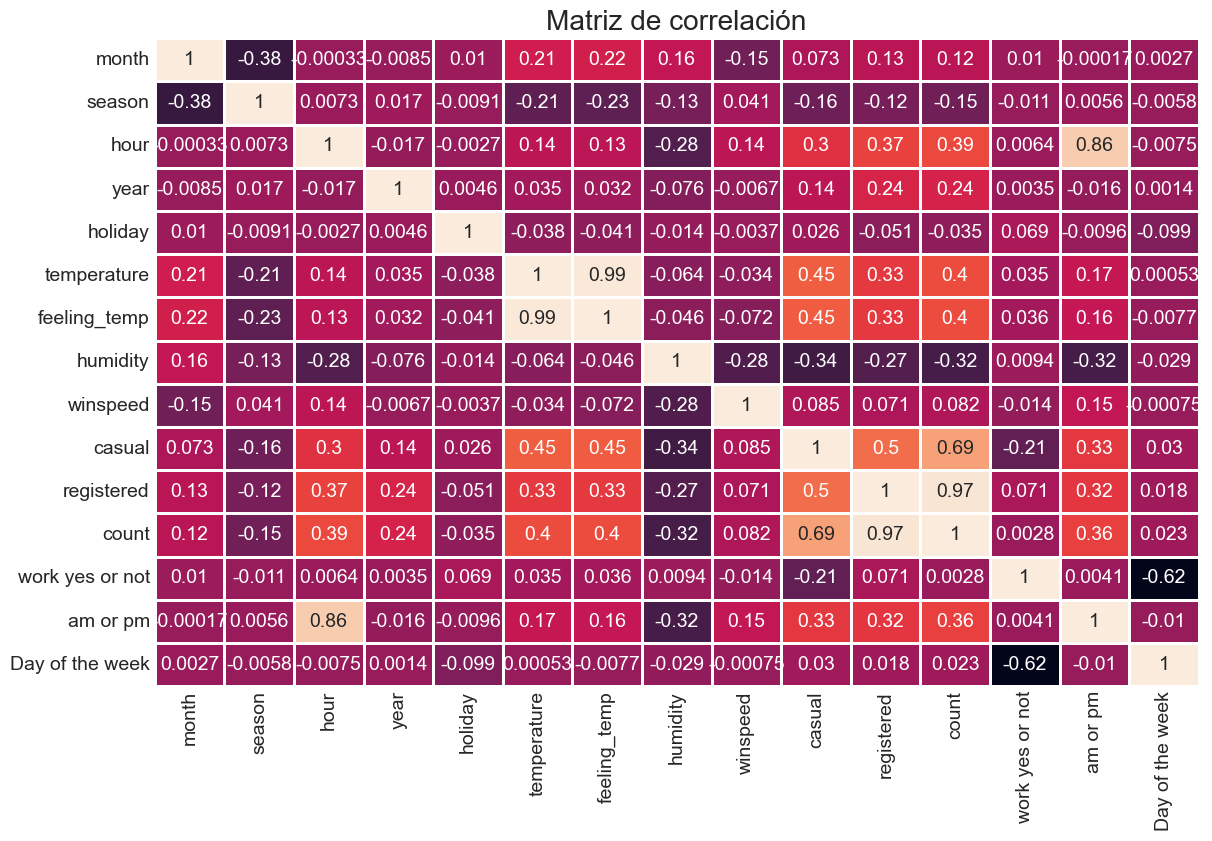

In [11]:
matriz = train.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(matriz, 
            annot=True, 
            cbar=False, 
           linewidths=1)
plt.title('Matriz de correlación')
plt.show()

In [12]:
display(train['season'].value_counts())

season
2    2641
1    2639
0    2595
3    2552
Name: count, dtype: int64

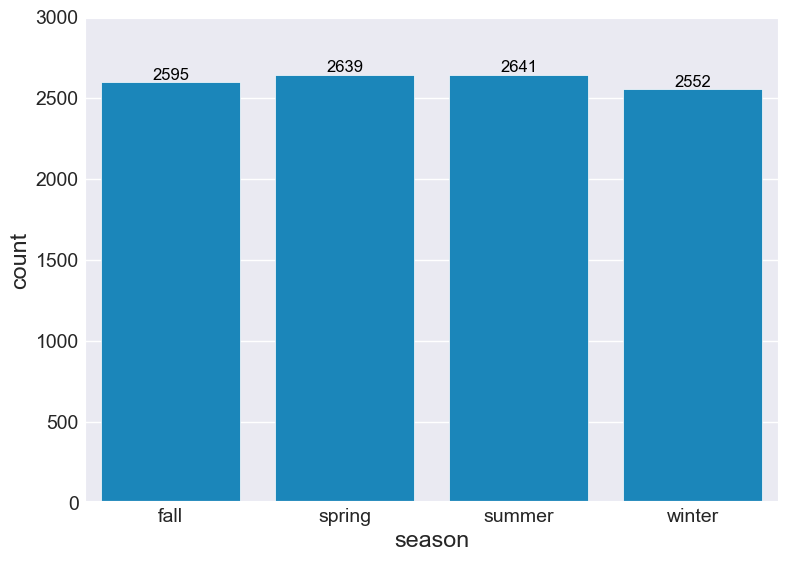

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear gráfico
sns.color_palette('hls', 8)
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=train)

# Extraer el eje del gráfico
ax = plt.gca()

# Ajustar límites
ymax = train['season'].value_counts().max()
ax.set_ylim(0, 3000)

# Etiquetas en el eje X (asegúrate de que 'estacion' esté definido)
ax.set_xticklabels(estacion)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # posición horizontal centrada
        p.get_height(),                  # altura de la barra
        '%d' % int(p.get_height()),      # texto: valor entero
        fontsize=12,
        color='black',
        ha='center',
        va='bottom'
    )

# Agrupacion por fecha y hora

In [14]:
train = train.set_index('date')
train

,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
date,,,,,,,,,,,,,,,
2012-01-28,1,3,11,2012,0,6.10,3.9980,56.0,8.9981,55,241,296,0,0,6
2011-07-06,7,2,7,2011,0,25.84,30.0020,79.0,0.0000,24,288,312,1,0,3
2011-04-14,4,1,22,2011,0,14.56,15.0002,55.0,7.0015,22,82,104,1,1,4
2012-02-13,2,3,0,2012,0,-1.42,-6.9976,46.0,15.0013,0,9,9,1,0,1
2012-10-08,10,0,14,2012,1,11.74,11.9972,58.0,7.0015,121,299,420,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-10,8,2,14,2011,0,31.48,32.0018,34.0,22.0028,62,116,178,1,1,3
2011-09-08,9,0,8,2011,0,21.14,20.0030,94.0,8.9981,7,188,195,1,0,4
2012-09-27,9,0,19,2012,0,23.02,24.9992,65.0,8.9981,48,511,559,1,1,4


In [15]:
test = test.set_index('date')
test

,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
date,,,,,,,,,,,,,,,
2011-06-01,6,2,20,2011,0,26.78,30.9986,79.0,16.9979,23,233,256,1,1,3
2012-05-25,5,1,23,2012,0,23.02,24.0026,78.0,15.0013,34,132,166,1,1,5
2012-05-20,5,1,2,2012,0,18.32,18.9998,52.0,0.0000,36,62,98,1,0,0
2012-10-26,10,0,17,2012,0,18.32,18.9998,76.0,12.9980,125,692,817,1,1,5
2011-10-05,10,0,3,2011,0,13.62,13.9970,82.0,7.0015,1,5,6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-26,12,3,16,2011,1,8.92,5.9978,43.0,19.0012,28,69,97,1,1,1
2012-04-16,4,1,5,2012,1,17.38,18.0032,77.0,15.0013,4,34,38,1,0,1
2011-10-01,10,0,9,2011,0,10.80,11.0006,82.0,23.9994,17,112,129,0,0,6


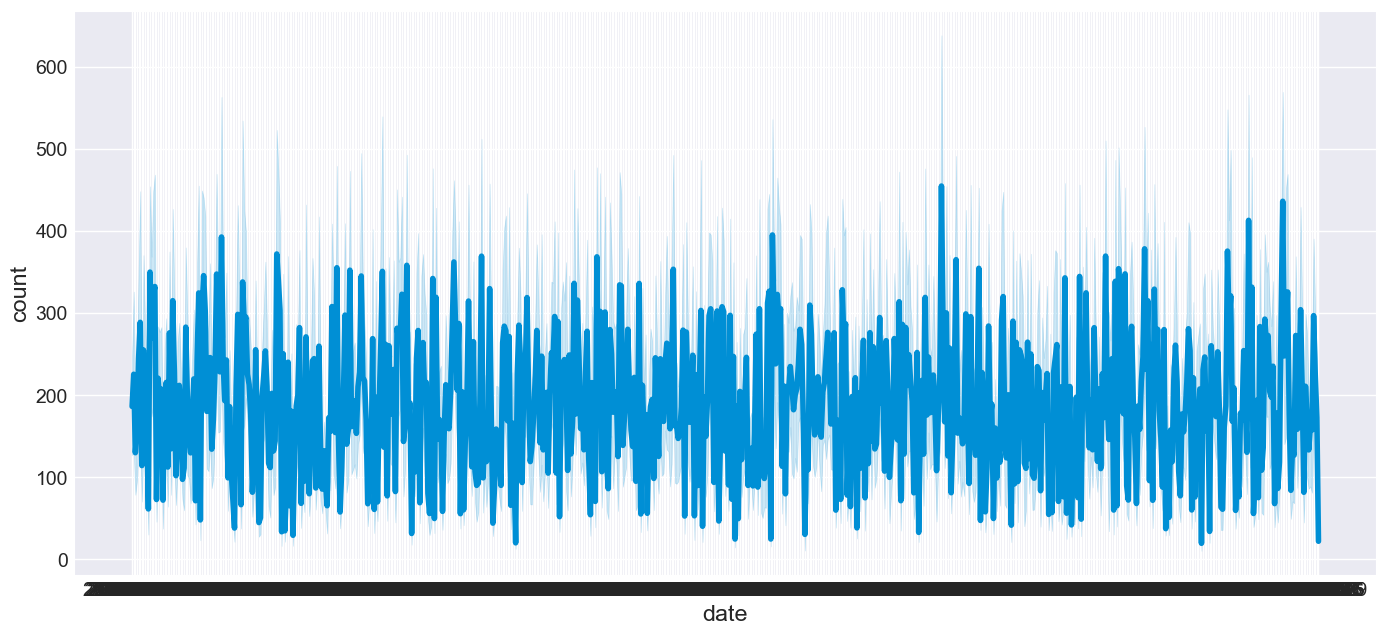

In [16]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='count', data=train)
ax.set_title('Cantidad de bicicletas compartidas por fecha', fontsize=24)
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Cantidad de bicicletas compartidas', fontsize=18)
plt.show()

In [17]:
train_month = pd.DataFrame(train.groupby(['year', 'month'])['count'].sum())
train_month

count
year month        
2011 1       23887
     2       29745
     3       38355
     4       58049
     5       84609
     6       79970
     7       81950
     8       86994
     9       76996
     10      82135
     11      60295
     12      53333
2012 1       55675
     2       63296
     3       94500
     4      104817
     5      120847
     6      119033
     7      123509
     8      124961
     9      125217
     10     114226
     11      91583
     12      74500

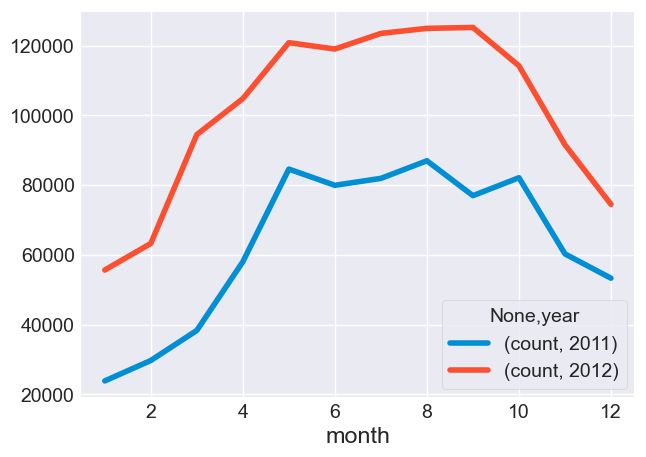

In [18]:
train_month.unstack(0).plot();

In [19]:
train_month.unstack(-1)

count                                                                \
month     1      2      3       4       5       6       7       8       9    
year                                                                         
2011   23887  29745  38355   58049   84609   79970   81950   86994   76996   
2012   55675  63296  94500  104817  120847  119033  123509  124961  125217   

                             
month      10     11     12  
year                         
2011    82135  60295  53333  
2012   114226  91583  74500

In [20]:
train_month_t = pd.DataFrame(train.groupby(['year', 'month', 'am or pm'])['count'].sum())
train_month_t

count
year month am or pm       
2011 1     0          8858
           1         15029
     2     0         11252
           1         18493
     3     0         13802
           1         24553
     4     0         19487
           1         38562
     5     0         28229
           1         56380
     6     0         26605
           1         53365
     7     0         26699
           1         55251
     8     0         29865
           1         57129
     9     0         26702
           1         50294
     10    0         29050
           1         53085
     11    0         22775
           1         37520
     12    0         21050
           1         32283
2012 1     0         23214
           1         32461
     2     0         25633
           1         37663
     3     0         31425
           1         63075
     4     0         38252
           1         66565
     5     0         43582
           1         77265
     6     0         43382
           1         75651
     7     0         43399
           1         80110
     8     0         45949
           1         79012
     9     0         47185
           1         78032
     10    0         42524
           1         71702
     11    0         35554
           1         56029
     12    0         29829
           1         44671

<Axes: xlabel='year,month'>

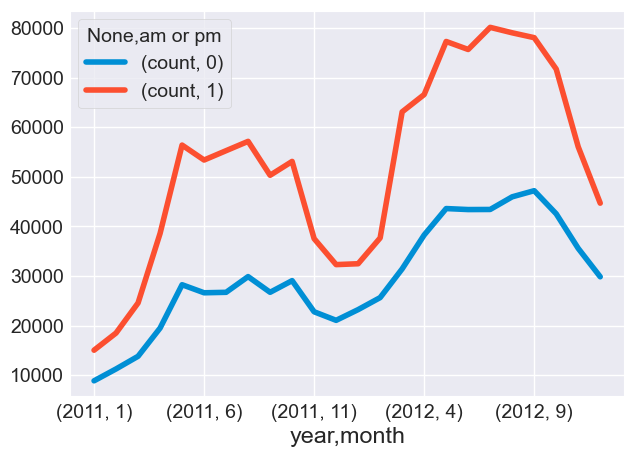

In [21]:
train_month_t.unstack(2).plot()

In [22]:
train_month = train.set_index('month').resample('M').sum()
train_month

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'